# Welcome to the challenge notebook

PulseNet has contacted us regarding the performance monitoring of the fine-tuned model we created for them. They want to see how the `training_loss` and `train_mean_token_accuracy` change in each `step` of the model training process.

Your task is to first extract the needed information from the trained model and use line charts to visualize `train_mean_token_accuracy` vs `step` and one line chart for `training_loss` vs `step`.

Follow the instructions in the notebook to complete the challenge task.

Good Luck🍀 <br>
-Ahmad

Installing the needed Modules

In [ ]:
!pip install openai==1.7.2 python-dotenv

Run the code block below to import the necessary modules and set up the OpenAI API. <br>
`Hint:` Do not forget to upload the `.env` file

In [1]:
import os
from openai import OpenAI
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv(dotenv_path='apikey.env.txt')

APIKEY = os.getenv("APIKEY")
ORGID = os.getenv("ORGID")

client = OpenAI(
  organization= ORGID,
  api_key=APIKEY
)

Run the code block below to retrieve all the fine-tuned models that you have trained on the OpenAI servers. And select the latest fine-tuning job from the list.

In [2]:
# Retrieving the list of fine-tuning jobs from the OpenAI client
fine_tuning_jobs = list(client.fine_tuning.jobs.list())

# Selecting the latest fine-tuning job from the list
latest_job = fine_tuning_jobs[-1]
latest_job

FineTuningJob(id='ftjob-5anlwXfCJg4rvoMG0d1yKywS', created_at=1720042477, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:viratec-interactive::9h2049QI', finished_at=1720042819, hyperparameters=Hyperparameters(n_epochs=1, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-y4N8JTA9pMOElcFMpsKSUUMv', result_files=['file-csvf71Xsf8nN9gc6DLwUL5pQ'], status='succeeded', trained_tokens=9052, training_file='file-0Cd3kGRwZIBT8P5cmsjawHrr', validation_file=None, user_provided_suffix=None, seed=828539739, estimated_finish=None, integrations=[])

Now retrieve all the event messages from the retrieved job and put it inside a variable called `events`

In [3]:
events = client.fine_tuning.jobs.list_events(
    fine_tuning_job_id=latest_job.id, limit=10
)
print(list(events))

[FineTuningJobEvent(id='ftevent-NQLzNSeDWiYN4QeijfDUebWu', created_at=1720042823, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-1moQVzDDL0niZFH6XwzqmjHo', created_at=1720042820, level='info', message='New fine-tuned model created: ft:gpt-3.5-turbo-0125:viratec-interactive::9h2049QI', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-oW8ClXaK11WkriGgY2PfLMKz', created_at=1720042815, level='info', message='Step 67/67: training loss=0.23', object='fine_tuning.job.event', data={'step': 67, 'train_loss': 0.22564782202243805, 'total_steps': 67, 'train_mean_token_accuracy': 0.8888888955116272}, type='metrics'), FineTuningJobEvent(id='ftevent-TnUnmJp7QagY2soRUu36Cdo7', created_at=1720042813, level='info', message='Step 66/67: training loss=0.18', object='fine_tuning.job.event', data={'step': 66, 'train_loss': 0.1824834644794464, 'total_steps': 67, 'train

Loop through the `events` and extract the following information from each event object and store them in different lists:
- steps
- training_loss
- train_mean_token_accuracy

`Hint:` Each event object inside the `events` list has a property called data. You can find what you need there!

In [4]:
# Initialize empty lists to store the extracted information
steps, training_loss, train_mean_token_accuracy = [], [], []

# Loop through each event object in the events list
# Extract and append the step, training loss, and train_mean_token_accuracy from the event object
# write your code here

for e in events:
    if e.data:
        steps.append(e.data['step'])
        training_loss.append(e.data['train_loss'])
        train_mean_token_accuracy.append(e.data['train_mean_token_accuracy'])

Create a line chart using Matplotlib to visualize how training loss changes over learning steps.

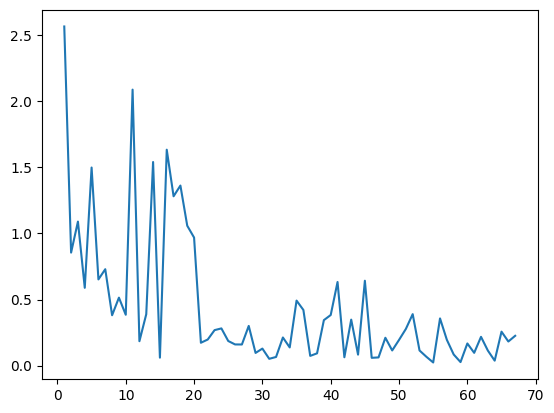

In [5]:
# write your code here
plt.plot(steps, training_loss)

Now create a line chart using Matplotlib to visualize how train_mean_token_accuracy changes over learning steps.

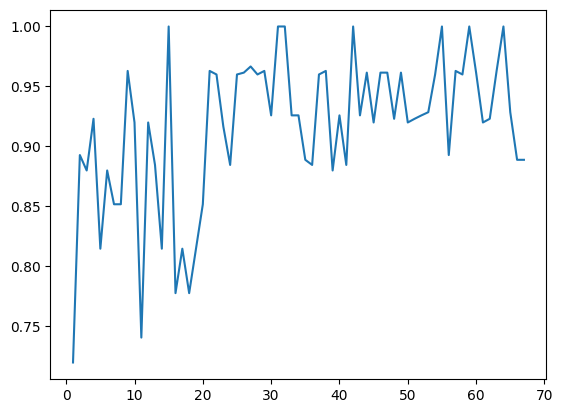

In [6]:
# write your code here
plt.plot(steps, train_mean_token_accuracy)

💡 A good model fine-tuning is indicated by a decrease in training loss over the learning steps and an increase in training mean token accuracy over the steps.

Look at the charts you created to assess if your training procedure was effective.